In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from utils import *
from darknet import Darknet

In [2]:
video = cv2.VideoCapture('camera/14290003.AVI')
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [3]:
nms_thresh = 0.6  
iou_thresh = 0.4



It took 2.110 seconds to detect the objects in the image.

Number of Objects Detected: 12 

[tensor(0.7173), tensor(0.5481), tensor(0.1228), tensor(0.1267), tensor(0.9968), tensor(1.0000), tensor(5)]


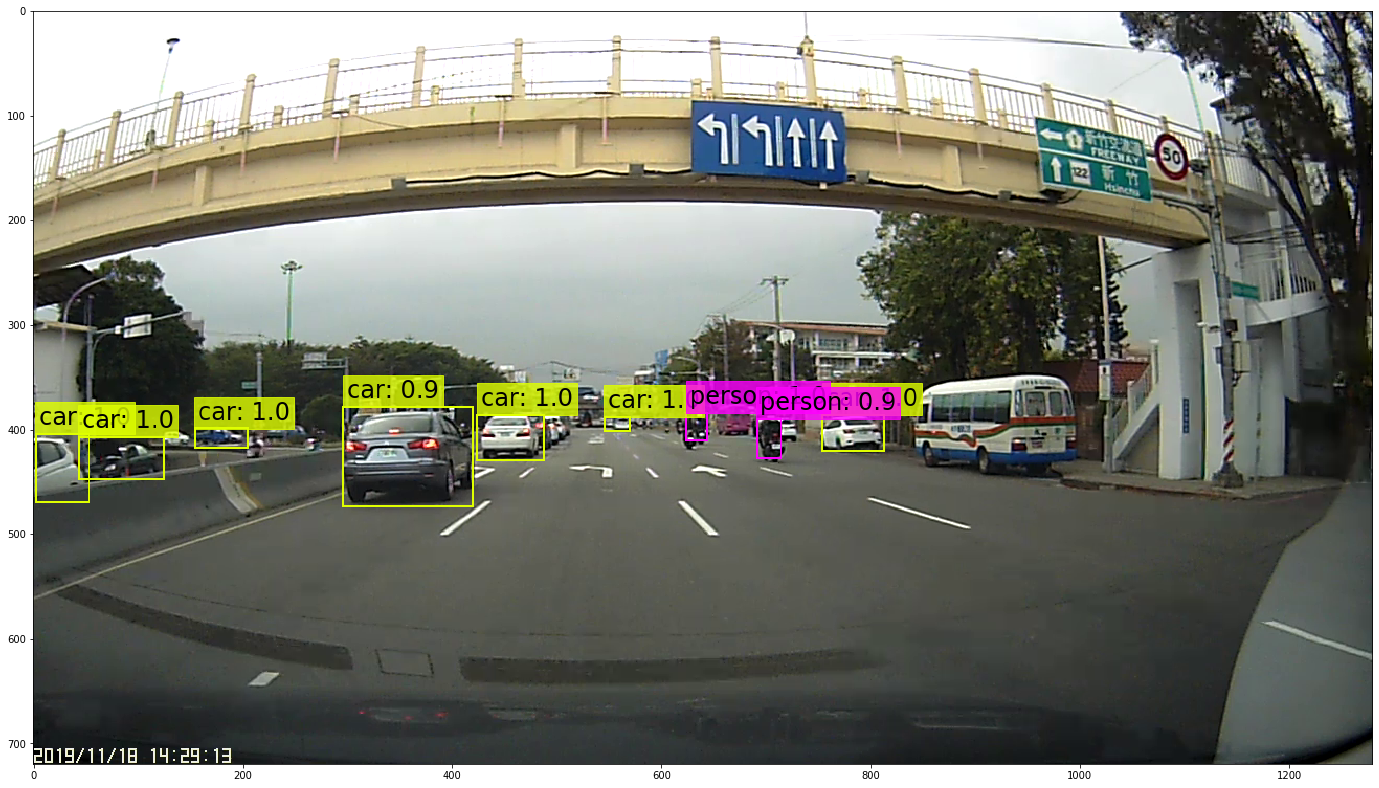

In [5]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]
while(video.isOpened()):
    ret, frame = video.read()

    original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized_frame = cv2.resize(original_frame, (m.width, m.height))
    
    boxes = detect_objects(m, resized_frame, iou_thresh, nms_thresh)
    
    print(boxes[0])
    
    
    
    


    #Plot the image with bounding boxes and corresponding object class labels
    plot_boxes(original_frame, boxes, class_names, plot_labels = True)
    break
video.release()
cv2.destroyAllWindows()